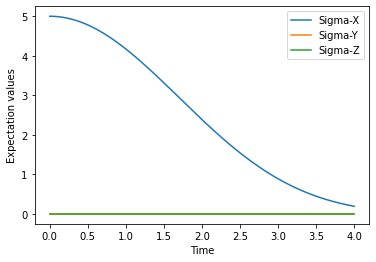

2.7958760261535645


In [22]:
import qutip
from qutip.piqs import *

import numpy as np
from qutip import sigmax, sigmay, sigmaz,tensor, qeye, Qobj
from qutip import basis
from qutip import sesolve

import matplotlib.pyplot as plt



n=5

def arraygen(n,A):
    Arr=[]
    for j in range(n):
        Arr.append(A)
    return Arr
    


def S_k(k,n=n):
    
    h=0*qeye(2**n)
    if k==0:
            
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmax()
            h=np.add(h,tensor(Arr))
    if k==1:
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmay()
            h=np.add(h,tensor(Arr))
    if k==2:
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmaz()
            h=np.add(h,tensor(Arr))
        
    
    return h/2
    

    
import matplotlib.pyplot as plt
import time

t0=time.time()


J=1
Omega=0
n=10

psi_init=np.cos(np.pi/4)*(basis(2,0)+basis(2,1))
psi0=Qobj(tensor(arraygen(n,psi_init)))

H=Qobj( (2*(J/n)*S_k(2,n)*S_k(2,n)+Omega*S_k(0,n))  )

times = np.linspace(0.0, 4, 1000)


def result():
    return sesolve(H, psi0, times, [Qobj(S_k(0,n)),Qobj(S_k(1,n)),Qobj(S_k(2,n))])

fig, ax = plt.subplots()
ax.plot(times, result().expect[0])
ax.plot(times, result().expect[1])
ax.plot(times, result().expect[2])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-X", "Sigma-Y","Sigma-Z",))
plt.show()


t1=time.time()


print(t1-t0)